In [8]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,
        postgres_pw, postgres_host, postgres_port, postgres_db))

In [4]:
pd.options.display.max_rows= None

In [5]:
df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

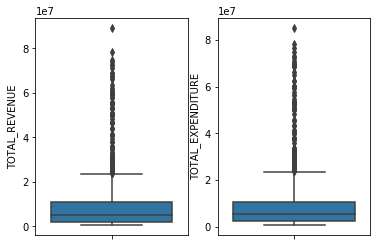

In [18]:
plt.subplot(1,2,1)
sns.boxplot(y= 'TOTAL_REVENUE', data=df)
plt.subplot(1,2,2)
sns.boxplot(y= 'TOTAL_EXPENDITURE', data=df)
plt.show()

Yes, lots of outliers for both values.

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

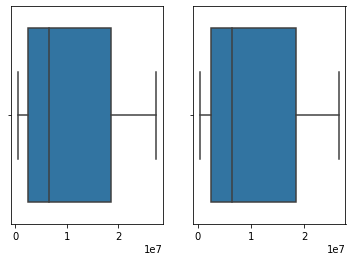

In [22]:
trw = winsorize(df['TOTAL_EXPENDITURE'], (0, 0.2))
tew = winsorize(df['TOTAL_REVENUE'], (0, 0.2))

plt.subplot(1,2,1)
sns.boxplot(trw)
plt.subplot(1,2,2)
sns.boxplot(tew)
plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

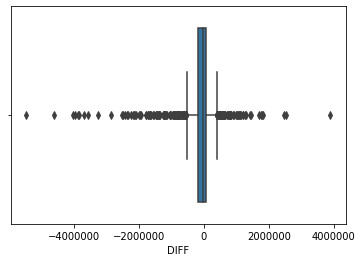

In [24]:
df['DIFF'] = df['TOTAL_REVENUE']-df['TOTAL_EXPENDITURE']
sns.boxplot(df['DIFF'])

/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


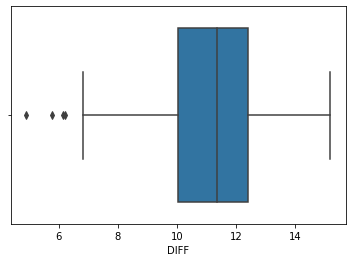

In [25]:
sns.boxplot(np.log(df['DIFF']))

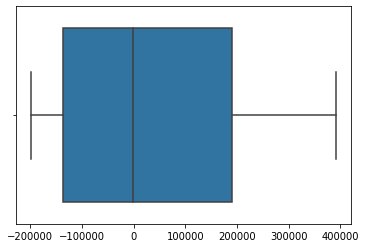

In [29]:
sns.boxplot(winsorize(df['DIFF'], (0.2,0.2)))

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

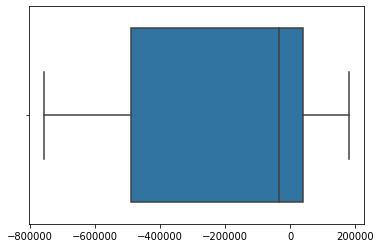

In [34]:
df['DIFFwin'] = winsorize(df['TOTAL_REVENUE'], (0.2,0.2))-winsorize(df['TOTAL_EXPENDITURE'], (0.2,0.2))
sns.boxplot(winsorize(df['DIFFwin'], (0.1, 0.1)))

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [40]:
print(df['DIFF'].describe())

print(df['DIFFwin'].describe())

count    1.280000e+03
mean    -1.045990e+05
std      5.734045e+05
min     -5.487742e+06
25%     -1.816858e+05
50%     -2.148400e+04
75%      5.130425e+04
max      3.897129e+06
Name: DIFF, dtype: float64
count    1.492000e+03
mean    -1.732541e+05
std      4.203798e+05
min     -1.650831e+06
25%     -4.888432e+05
50%     -3.477150e+04
75%      4.112900e+04
max      2.520706e+06
Name: DIFFwin, dtype: float64


If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

These look somewhat similar which might mean these are a bit over-winsorize.

In [ ]:
#Z-score builder
z_scores = zscore(df[""])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))